In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [52]:
df = pd.read_csv('data/Bank Customer Churn Prediction.csv')

In [53]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [54]:
del df['customer_id']

In [55]:
for c in df.columns:
    if df[c].dtypes == 'object':
        df[c] = df[c].str.lower()

In [56]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,850,spain,female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,france,male,39,5,0.00,2,1,0,96270.64,0
9996,516,france,male,35,10,57369.61,1,1,1,101699.77,0
9997,709,france,female,36,7,0.00,1,0,1,42085.58,1
9998,772,germany,male,42,3,75075.31,2,1,0,92888.52,1


In [57]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

## EDA

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64


<Axes: xlabel='churn'>

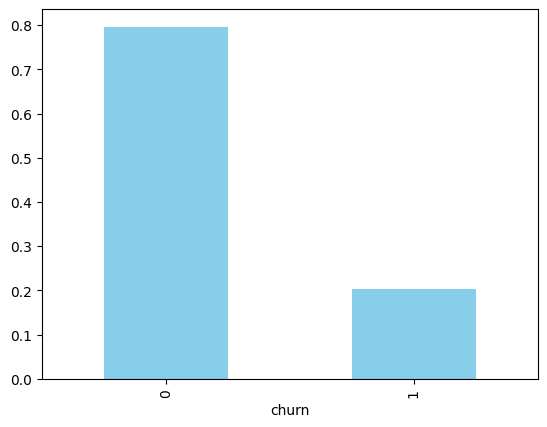

In [58]:
print(df['churn'].value_counts(normalize=True))
df['churn'].value_counts(normalize=True).plot(kind='bar', color='skyblue')

In [59]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,850,spain,female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,france,male,39,5,0.00,2,1,0,96270.64,0
9996,516,france,male,35,10,57369.61,1,1,1,101699.77,0
9997,709,france,female,36,7,0.00,1,0,1,42085.58,1
9998,772,germany,male,42,3,75075.31,2,1,0,92888.52,1


In [60]:
numerical = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

In [61]:
categorical = ['country', 'gender', 'credit_card', 'active_member']

In [62]:
df[categorical].nunique()

country          3
gender           2
credit_card      2
active_member    2
dtype: int64

In [63]:
churn_categorical = {}
for i in categorical:
    churn_categorical[i] = {}
    for j in df[i].unique():
        churn_categorical[i][j] = df[df[i] == j]['churn'].value_counts(normalize=True)
churn_categorical

{'country': {'france': churn
  0    0.838452
  1    0.161548
  Name: proportion, dtype: float64,
  'spain': churn
  0    0.833266
  1    0.166734
  Name: proportion, dtype: float64,
  'germany': churn
  0    0.675568
  1    0.324432
  Name: proportion, dtype: float64},
 'gender': {'female': churn
  0    0.749285
  1    0.250715
  Name: proportion, dtype: float64,
  'male': churn
  0    0.835441
  1    0.164559
  Name: proportion, dtype: float64},
 'credit_card': {np.int64(1): churn
  0    0.798157
  1    0.201843
  Name: proportion, dtype: float64,
  np.int64(0): churn
  0    0.791851
  1    0.208149
  Name: proportion, dtype: float64},
 'active_member': {np.int64(1): churn
  0    0.857309
  1    0.142691
  Name: proportion, dtype: float64,
  np.int64(0): churn
  0    0.731491
  1    0.268509
  Name: proportion, dtype: float64}}

## Feature Importance

In [64]:
import ipywidgets as widgets
from IPython.display import display

In [65]:
global_churn = df['churn'].value_counts(normalize=True)
global_churn

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

### Churn rate
Es la diferencia entre el porcentaje de la variable objetivo (*churn = 1*) y el porcentaje de las categorias para una característica. Si esta diferencia es mayor que 0, significa que la categoría tiene menos probabilidades de *churn*, y si la diferencia es menor que 0, el grupo tiene más probabilidades de *churn*. Las diferencias mayores son indicadores de que una variable es más importante que otras.
$$\text{churn rate} =\text{global} - \text{group}$$

### Risk ratio
Relación entre la media de las categorias de una característica y la media de la variable objetivo. Si esta relación es mayor que 1, la categoría tiene más probabilidades de abandono, y si es menor que 1, la categoría tiene menos probabilidades de abandono. Expresa la importancia de la característica en términos relativos.
$$\text{risk ratio} = \frac{\text{group}}{\text{global}}$$

In [66]:
def graficar_elemento(categoria, elemento):
    if categoria and elemento:
        data = churn_categorical[categoria][elemento]
        #data.plot(kind='bar', label=f'{categoria} - {elemento}')
        #global_churn.plot(kind='bar', label=f'{global_churn}')
        x = np.arange(len(data.index)) # Posiciones de las categorias
        ancho_barras = 0.35
        fig, ax = plt.subplots()
        plot1 = ax.bar(x - ancho_barras/2, data, ancho_barras, label=f'{categoria} - {elemento}')
        plot2 = ax.bar(x + ancho_barras/2, global_churn, label=f'global churn')
        ax.set_xlabel('Categorías')
        ax.set_ylabel('%')
        ax.set_xticks(x)
        ax.set_xticklabels(data.index)
        ax.legend()
        plt.show()
        print(data)
        print('----- churn rate ----')
        print(global_churn[1] - data[1])
        print('--- risk ratio ---')
        print(data[1] / global_churn[1])

categoria = widgets.Dropdown(options=churn_categorical.keys(), description='Categoría:')
elemento = widgets.Dropdown(options=[], description='Elemento:')
opciones_menu_categoria = list(churn_categorical.keys())
widgets.interact(graficar_elemento,
                 categoria= categoria,
                 elemento= elemento
                )
def actualizar_elemento(*args):
    global elemento
    # Actualizar las opciones del segundo menú basado en la categoría seleccionada
    categoria_seleccionada = categoria.value
    if categoria_seleccionada:
        elemento.options = churn_categorical[categoria_seleccionada].keys()

categoria.observe(actualizar_elemento, names='value')
actualizar_elemento()

interactive(children=(Dropdown(description='Categoría:', options=('country', 'gender', 'credit_card', 'active_…

### Mutual information

In [67]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df.churn)

In [68]:
m_i = df[categorical].apply(mutual_info_churn_score)
m_i.sort_values(ascending=False)

country          0.014017
active_member    0.012291
gender           0.005652
credit_card      0.000025
dtype: float64

### Correlation

El **coeficiente de correlación** mide le grado de dependencias entre dos variables.
Si `r` es el coeficiente de correlación entonces la correlación entre dos variables es:
- **Baja** cuando `r` está entre [0, -0.2) o [0, 0.2)
- **Moderada** cuando `r` está entre [-0.2,-0.5) o [0.2, 0.5)
- **Fuerte** cuando `r` está entre [-0.5, -1.0] o [0.5, 1.0]

In [69]:
df[numerical].corrwith(df.churn)

credit_score       -0.027094
age                 0.285323
tenure             -0.014001
balance             0.118533
products_number    -0.047820
estimated_salary    0.012097
dtype: float64

## One-hot encoding


In [70]:
df = pd.get_dummies(df).astype(int)
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_france,country_germany,country_spain,gender_female,gender_male
0,619,42,2,0,1,1,1,101348,1,1,0,0,1,0
1,608,41,1,83807,1,0,1,112542,0,0,0,1,1,0
2,502,42,8,159660,3,1,0,113931,1,1,0,0,1,0
3,699,39,1,0,2,0,0,93826,0,1,0,0,1,0
4,850,43,2,125510,1,1,1,79084,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,1,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,1,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,1,0,0,1,0
9998,772,42,3,75075,2,1,0,92888,1,0,1,0,0,1


## Preparación de datos

In [71]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [72]:
len(df_train), len(df_val), len(df_test)

(6000, 2000, 2000)

In [73]:
df_full_train = df_full_train.reset_index()
df_train = df_train.reset_index()
df_val = df_val.reset_index()
df_test = df_test.reset_index()

In [74]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

## Regrasión logística

In [75]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [76]:
def linear_regression(xi):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [77]:
def logistic_regression(xi):
    score = w0

    for i in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return result

In [78]:
df_train

,index,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_france,country_germany,country_spain,gender_female,gender_male
0,4495,789,32,7,69423,1,1,0,107499,1,0,0,1,0
1,6470,583,41,5,77647,1,1,0,190429,0,1,0,1,0
2,2221,767,35,6,132253,1,1,0,115566,0,1,0,1,0
3,7686,718,48,9,0,2,1,1,72105,1,0,0,0,1
4,9419,686,26,1,57422,1,1,1,79189,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,7586,828,42,10,0,1,1,1,186071,0,0,1,0,1
5996,8288,850,34,9,92899,2,1,0,97465,1,0,0,1,0
5997,9718,710,62,3,131078,2,1,0,119348,0,0,1,0,1
5998,7562,685,33,6,0,1,1,0,58458,1,0,0,0,1


In [79]:
y_train

array([0, 0, 1, ..., 1, 0, 1])

In [80]:
df_val

,index,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_france,country_germany,country_spain,gender_female,gender_male
0,7857,850,27,6,96654,2,0,0,152740,1,0,0,0,1
1,9924,632,50,5,107959,1,1,1,6985,0,1,0,1,0
2,3087,439,36,2,165536,2,1,1,123956,1,0,0,0,1
3,3513,790,33,10,135120,1,0,0,195204,1,0,0,1,0
4,2105,492,31,7,0,2,1,1,49463,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1751,541,29,7,127504,1,0,0,86173,1,0,0,0,1
1996,153,539,37,2,127609,1,1,0,98646,1,0,0,0,1
1997,9651,469,33,1,127818,1,1,0,163477,1,0,0,0,1
1998,6749,684,24,9,79263,1,0,1,196574,0,0,1,1,0


In [81]:
model = LogisticRegression()
model.fit(df_train, y_train)

/home/elcabris/Documents/scientific computing/machine learning/machine-learning-env/lib64/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [82]:
y_pred_val = model.predict_proba(df_val)[:, 1]

In [83]:
churn_decision_val = (y_pred_val >= 0.5).astype(int)

In [84]:
(y_val == churn_decision_val).mean()

np.float64(0.786)

In [85]:
y_pred_test = model.predict_proba(df_test)[:, 1]
churn_decision_test = (y_pred_test >= 0.5).astype(int)
(y_test == churn_decision_test).mean()

np.float64(0.787)